In [13]:
import csv

def process_csv(filename):
    exampleFile = open(filename, encoding="utf-8")
    exampleReader = csv.reader(exampleFile)
    exampleData = list(exampleReader)
    exampleFile.close()
    return exampleData

# use process_csv to pull out the header and data rows
csv_rows = process_csv("water_main_breaks.csv")
csv_header = csv_rows[0]
csv_data = csv_rows[1:]

In [14]:
from collections import OrderedDict 
pipe_depth={}
index= csv_header.index("pipe_depth_ft")

for i in csv_data:
    if i[index] in pipe_depth:
        pipe_depth[i[index]]+=float(1)
    else:
        pipe_depth[i[index]]=float(1)

pipe_depth.pop('0')
pipe_depth.pop('')

4242.0

In [15]:
import matplotlib.pyplot as plt
from pandas import Series
from pandas import DataFrame
%matplotlib inline

In [20]:
df=DataFrame(Series(pipe_depth))
df.index=df.index.astype(float)
df=df.sort_index()
df

,0
2.50,1.0
2.67,1.0
3.00,3.0
3.50,4.0
3.58,1.0
...,...
11.10,1.0
12.00,1.0
13.00,2.0
14.00,1.0


In [21]:
prev=0
for i in df.index:
    if i !=2.5:
        df[0][i]+=df[0][prev]
    
    
    prev=i
        
df

,0
2.50,1.0
2.67,2.0
3.00,5.0
3.50,9.0
3.58,10.0
...,...
11.10,2744.0
12.00,2745.0
13.00,2747.0
14.00,2748.0


In [22]:
for i in df.index:
    df[0][i]/=2749

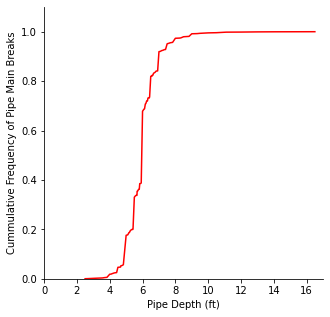

In [26]:
ax1= df.plot.line(color="r",xticks=[0,2,4,6,8,10,12,14,16],figsize=[5,5],legend=None)
ax1.set_xlim([0,17])
ax1.set_ylim([0,1.1])
ax1.set_ylabel("Cummulative Frequency of Pipe Main Breaks")
ax1.set_xlabel("Pipe Depth (ft)")
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)